# Mean by Date

In [2]:
#calculating mean of same dates
import pandas as pd

In [3]:
df_AAPL_STOCK = pd.read_csv(r'E:\Semesters\Fyp prepation\Dataset\AAPL_Stock_Dataset/AAPL.csv')
df_AAPL_STOCK['Date_obj'] = pd.to_datetime(df_AAPL_STOCK["Date"]).dt.date


In [4]:
df_AAPL_NEWS_WITH_SENTI = pd.read_csv(r'E:\Semesters\Fyp prepation\Dataset\AAPL_Stock_Dataset/Apple_news_dataset_with_sentiment.csv', index_col= False)
df_AAPL_NEWS_WITH_SENTI['Date_obj'] =  pd.to_datetime(df_AAPL_NEWS_WITH_SENTI['Data_Time']).dt.date


In [5]:
df_AAPL_STOCK_SENTI_MEAN = df_AAPL_NEWS_WITH_SENTI.groupby('Date_obj')[['pos_sentm', 'neg_sentm']].mean()
df_AAPL_STOCK_SENTI_MEAN = pd.merge(df_AAPL_STOCK_SENTI_MEAN,df_AAPL_STOCK,on='Date_obj')

In [6]:
df_AAPL_STOCK_SENTI_MEAN

,Date_obj,pos_sentm,neg_sentm,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-03-28,0.735000,0.265000,2007-03-28,3.388571,3.407143,3.326786,3.330000,2.838551,942337200
1,2007-07-20,0.532000,0.468000,2007-07-20,5.058929,5.149286,5.000000,5.133929,4.376253,1167773600
2,2010-01-28,0.561500,0.438500,2010-01-28,7.318929,7.339286,7.096429,7.117500,6.067084,1173502400
3,2010-02-26,0.699000,0.301000,2010-02-26,7.227857,7.327500,7.214286,7.307857,6.229348,507460800
4,2010-04-23,0.490778,0.509222,2010-04-23,9.571071,9.720714,9.535714,9.672500,8.245010,796955600
...,...,...,...,...,...,...,...,...,...,...
569,2013-11-19,0.181800,0.218200,2013-11-19,18.536785,18.692142,18.498928,18.555357,16.358257,208938800
570,2013-11-20,0.162667,0.504000,2013-11-20,18.543928,18.586430,18.368929,18.392857,16.214994,193916800
571,2013-11-21,0.522889,0.477111,2013-11-21,18.485714,18.614643,18.345358,18.612143,16.408310,262026800
572,2013-11-22,0.815750,0.184250,2013-11-22,18.554285,18.648571,18.518929,18.564285,16.366125,223725600


# Scaling Sentiment Value


In [7]:
import bisect

In [8]:
def scale_sentm(dataframe,column_to_scale, breakpoints=[0,0.20,0.40,0.60,0.80]):
    dataframe.insert(3, 'sentm_score',None)
    for i in range(len(dataframe)):
        sentm_value = dataframe[f'{column_to_scale}'][i]
        dataframe['sentm_score'][i] =bisect.bisect(breakpoints, sentm_value)
        
    return dataframe
    
    
    

In [9]:
df_AAPL_STOCK_SENTI_MEAN_SCALED =scale_sentm(df_AAPL_STOCK_SENTI_MEAN.copy(),'pos_sentm')
df_AAPL_STOCK_SENTI_MEAN_SCALED

<ipython-input-8-1d58b9ed98f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sentm_score'][i] =bisect.bisect(breakpoints, sentm_value)


,Date_obj,pos_sentm,neg_sentm,sentm_score,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-03-28,0.735000,0.265000,4,2007-03-28,3.388571,3.407143,3.326786,3.330000,2.838551,942337200
1,2007-07-20,0.532000,0.468000,3,2007-07-20,5.058929,5.149286,5.000000,5.133929,4.376253,1167773600
2,2010-01-28,0.561500,0.438500,3,2010-01-28,7.318929,7.339286,7.096429,7.117500,6.067084,1173502400
3,2010-02-26,0.699000,0.301000,4,2010-02-26,7.227857,7.327500,7.214286,7.307857,6.229348,507460800
4,2010-04-23,0.490778,0.509222,3,2010-04-23,9.571071,9.720714,9.535714,9.672500,8.245010,796955600
...,...,...,...,...,...,...,...,...,...,...,...
569,2013-11-19,0.181800,0.218200,1,2013-11-19,18.536785,18.692142,18.498928,18.555357,16.358257,208938800
570,2013-11-20,0.162667,0.504000,1,2013-11-20,18.543928,18.586430,18.368929,18.392857,16.214994,193916800
571,2013-11-21,0.522889,0.477111,3,2013-11-21,18.485714,18.614643,18.345358,18.612143,16.408310,262026800
572,2013-11-22,0.815750,0.184250,5,2013-11-22,18.554285,18.648571,18.518929,18.564285,16.366125,223725600


In [76]:
df_AAPL_STOCK_SENTI_MEAN_SCALED.to_csv('E:\Semesters\Fyp prepation\Dataset\AAPL_Stock_Dataset\AAPL_STOCK_SENTI_MEAN_SCALED.csv')

In [196]:
df_plt= df_AAPL_STOCK_SENTI_MEAN_SCALED[['pos_sentm','Close']]

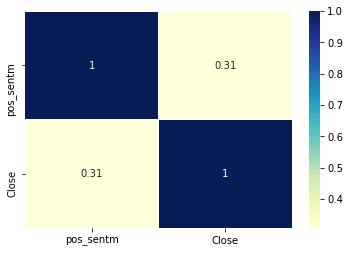

In [220]:
df_plt.reset_index()
plt = sb.heatmap(df_plt.tail(410).corr(), cmap="YlGnBu", annot=True, linewidths=.5)

# Generating Time Series

In [78]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [159]:
import numpy as np
def df_to_windowed_df_backward(dataframe, first_date_str,last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date
    
    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+ datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
        
        if last_time:
            break
        
        target_date = next_date

        if target_date == last_date:
            last_time = True
        
    ret_df = pd.DataFrame({})
    ret_df['Date'] = dates
    
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
    
    ret_df['Target'] = Y 
    
    ret_df  = pd.merge(ret_df,dataframe[['pos_sentm','neg_sentm','sentm_score']],on= 'Date')


    return ret_df
        

In [149]:
import numpy as np
def df_to_windowed_df_forward(dataframe, first_date_str,last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date
    
    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[1:], values[0]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+ datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
        
        if last_time:
            break
        
        target_date = next_date

        if target_date == last_date:
            last_time = True
        
    ret_df = pd.DataFrame({})
    ret_df['Date'] = dates
    
    ret_df['Target'] = Y 

    
    X = np.array(X)
    for i in range(0, n):
        #X[:, i]
        ret_df[f'Target+{i+1}'] = X[:, i]
        
    
    ret_df  = pd.merge(ret_df,dataframe[['pos_sentm','neg_sentm','sentm_score']],on= 'Date')

    return ret_df
        

In [97]:
df_AAPL_STOCK_SENTI_MEAN_SCALED['Date'] = df_AAPL_STOCK_SENTI_MEAN_SCALED['Date'].apply(str_to_datetime)
df_AAPL_STOCK_SENTI_MEAN_SCALED['Date']


0     2007-03-28
1     2007-07-20
2     2010-01-28
3     2010-02-26
4     2010-04-23
         ...    
569   2013-11-19
570   2013-11-20
571   2013-11-21
572   2013-11-22
573   2013-11-25
Name: Date, Length: 574, dtype: datetime64[ns]

In [98]:
df_AAPL_STOCK_SENTI_MEAN_SCALED.index = df_AAPL_STOCK_SENTI_MEAN_SCALED.pop('Date')
df_AAPL_STOCK_SENTI_MEAN_SCALED

,Date_obj,pos_sentm,neg_sentm,sentm_score,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,
2007-03-28,2007-03-28,0.735000,0.265000,4,3.388571,3.407143,3.326786,3.330000,2.838551,942337200
2007-07-20,2007-07-20,0.532000,0.468000,3,5.058929,5.149286,5.000000,5.133929,4.376253,1167773600
2010-01-28,2010-01-28,0.561500,0.438500,3,7.318929,7.339286,7.096429,7.117500,6.067084,1173502400
2010-02-26,2010-02-26,0.699000,0.301000,4,7.227857,7.327500,7.214286,7.307857,6.229348,507460800
2010-04-23,2010-04-23,0.490778,0.509222,3,9.571071,9.720714,9.535714,9.672500,8.245010,796955600
...,...,...,...,...,...,...,...,...,...,...
2013-11-19,2013-11-19,0.181800,0.218200,1,18.536785,18.692142,18.498928,18.555357,16.358257,208938800
2013-11-20,2013-11-20,0.162667,0.504000,1,18.543928,18.586430,18.368929,18.392857,16.214994,193916800
2013-11-21,2013-11-21,0.522889,0.477111,3,18.485714,18.614643,18.345358,18.612143,16.408310,262026800


In [124]:
df_AAPL_STOCK_SENTI_MEAN_SCALED


,Date_obj,pos_sentm,neg_sentm,sentm_score,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,
2007-03-28,2007-03-28,0.735000,0.265000,4,3.388571,3.407143,3.326786,3.330000,2.838551,942337200
2007-07-20,2007-07-20,0.532000,0.468000,3,5.058929,5.149286,5.000000,5.133929,4.376253,1167773600
2010-01-28,2010-01-28,0.561500,0.438500,3,7.318929,7.339286,7.096429,7.117500,6.067084,1173502400
2010-02-26,2010-02-26,0.699000,0.301000,4,7.227857,7.327500,7.214286,7.307857,6.229348,507460800
2010-04-23,2010-04-23,0.490778,0.509222,3,9.571071,9.720714,9.535714,9.672500,8.245010,796955600
...,...,...,...,...,...,...,...,...,...,...
2013-11-19,2013-11-19,0.181800,0.218200,1,18.536785,18.692142,18.498928,18.555357,16.358257,208938800
2013-11-20,2013-11-20,0.162667,0.504000,1,18.543928,18.586430,18.368929,18.392857,16.214994,193916800
2013-11-21,2013-11-21,0.522889,0.477111,3,18.485714,18.614643,18.345358,18.612143,16.408310,262026800


In [160]:
starting_date ='2012-4-1'
ending_date = '2013-11-25'
n =5
windowed_df_backward = df_to_windowed_df_backward(df_AAPL_STOCK_SENTI_MEAN_SCALED,'2012-4-1','2013-11-25', n=n)
windowed_df_backward

,Date,Target-5,Target-4,Target-3,Target-2,Target-1,Target,pos_sentm,neg_sentm,sentm_score
0,2012-04-03,21.945715,22.057858,21.780714,21.412500,22.093929,22.475714,0.766375,0.233625,4
1,2012-04-04,22.057858,21.780714,21.412500,22.093929,22.475714,22.296785,0.365000,0.635000,2
2,2012-04-05,21.780714,21.412500,22.093929,22.475714,22.296785,22.631430,0.378000,0.622000,2
3,2012-04-09,21.412500,22.093929,22.475714,22.296785,22.631430,22.722500,0.238400,0.761600,2
4,2012-04-10,22.093929,22.475714,22.296785,22.631430,22.722500,22.444286,0.634667,0.365333,4
...,...,...,...,...,...,...,...,...,...,...
386,2013-11-19,18.571787,18.593929,18.862858,18.749643,18.522499,18.555357,0.181800,0.218200,1
387,2013-11-20,18.593929,18.862858,18.749643,18.522499,18.555357,18.392857,0.162667,0.504000,1
388,2013-11-21,18.862858,18.749643,18.522499,18.555357,18.392857,18.612143,0.522889,0.477111,3
389,2013-11-22,18.749643,18.522499,18.555357,18.392857,18.612143,18.564285,0.815750,0.184250,5


In [170]:
starting_date ='2012-4-1'
ending_date = '2013-11-25'
n =5
windowed_df_forward = df_to_windowed_df_forward(df_AAPL_STOCK_SENTI_MEAN_SCALED,'2012-4-1','2013-11-25', n=n)
windowed_df_forward

,Date,Target,Target+1,Target+2,Target+3,Target+4,Target+5,pos_sentm,neg_sentm,sentm_score
0,2012-04-03,21.945715,22.057858,21.780714,21.412500,22.093929,22.475714,0.766375,0.233625,4
1,2012-04-04,22.057858,21.780714,21.412500,22.093929,22.475714,22.296785,0.365000,0.635000,2
2,2012-04-05,21.780714,21.412500,22.093929,22.475714,22.296785,22.631430,0.378000,0.622000,2
3,2012-04-09,21.412500,22.093929,22.475714,22.296785,22.631430,22.722500,0.238400,0.761600,2
4,2012-04-10,22.093929,22.475714,22.296785,22.631430,22.722500,22.444286,0.634667,0.365333,4
...,...,...,...,...,...,...,...,...,...,...
386,2013-11-19,18.571787,18.593929,18.862858,18.749643,18.522499,18.555357,0.181800,0.218200,1
387,2013-11-20,18.593929,18.862858,18.749643,18.522499,18.555357,18.392857,0.162667,0.504000,1
388,2013-11-21,18.862858,18.749643,18.522499,18.555357,18.392857,18.612143,0.522889,0.477111,3
389,2013-11-22,18.749643,18.522499,18.555357,18.392857,18.612143,18.564285,0.815750,0.184250,5


In [154]:
stock_name ='AAPL'
windowed_df_forward.to_csv(f'E:\Semesters\Fyp prepation\Dataset\AAPL_Stock_Dataset\{stock_name}_STOCK_SENTI_SCORE_{n}_FORWARD_{starting_date}_TO_{ending_date}_.csv')

In [162]:
stock_name ='AAPL'
windowed_df_backward.to_csv(f'E:\Semesters\Fyp prepation\Dataset\AAPL_Stock_Dataset\{stock_name}_STOCK_SENTI_SCORE_{n}_BACKWARD_{starting_date}_TO_{ending_date}_.csv')

In [178]:
import matplotlib.pyplot as mp
import seaborn as sb
  

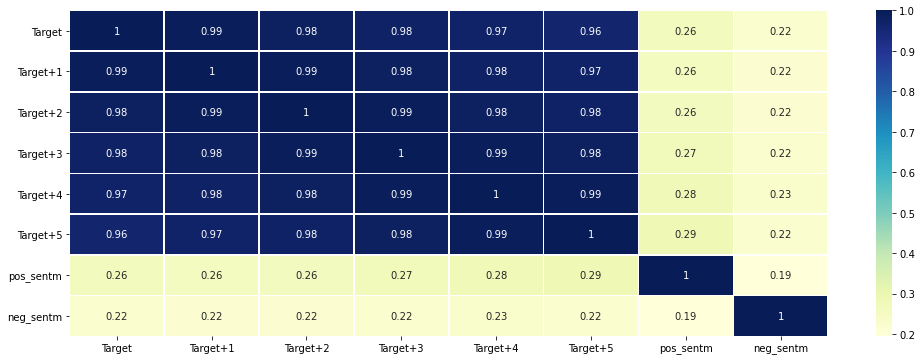

In [179]:
mp.figure(figsize = (17,6))
dataplot_forward = sb.heatmap(windowed_df_forward.corr(), cmap="YlGnBu", annot=True, linewidths=.5)

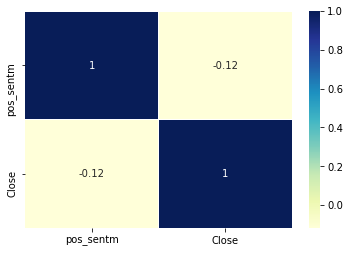

In [198]:
#df_plt = windowed_df_forward[['Target','pos_sentm']]
plt = sb.heatmap(df_plt.corr(), cmap="YlGnBu", annot=True, linewidths=.5)